<a href="https://colab.research.google.com/github/Zobya/Handwritten-digit-recogniton-MNIST-/blob/main/MNISTdigitRecogCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


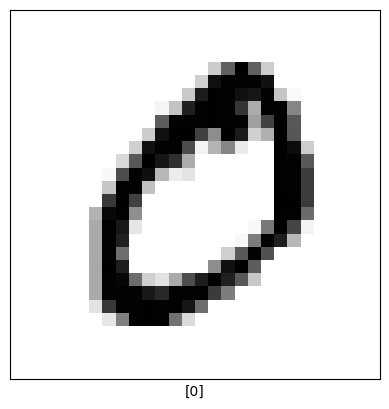

In [ ]:
#Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN \n",
x_test = x_test.reshape(-1,28, 28, 1)

In [ ]:
model_log=model.fit(x_train, y_train, batch_size=60, epochs=10,verbose=1,validation_split=.3)

Epoch 1/10
700/700 [==============================] - 81s 114ms/step - loss: 0.3745 - accuracy: 0.8804 - val_loss: 0.1030 - val_accuracy: 0.9693
Epoch 2/10
700/700 [==============================] - 67s 95ms/step - loss: 0.1412 - accuracy: 0.9567 - val_loss: 0.0727 - val_accuracy: 0.9769
Epoch 3/10
700/700 [==============================] - 75s 107ms/step - loss: 0.1102 - accuracy: 0.9657 - val_loss: 0.0564 - val_accuracy: 0.9822
Epoch 4/10
700/700 [==============================] - 66s 95ms/step - loss: 0.0897 - accuracy: 0.9722 - val_loss: 0.0530 - val_accuracy: 0.9831
Epoch 5/10
700/700 [==============================] - 67s 96ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 6/10
700/700 [==============================] - 65s 93ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.0462 - val_accuracy: 0.9856
Epoch 7/10
700/700 [==============================] - 70s 100ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0413 - val_accura

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
#Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9891999959945679


In [ ]:
predictions = model.predict(x_test)
#predictions[0]

313/313 [==============================] - 4s 13ms/step


In [ ]:
np.argmax(predictions[0])

7

In [ ]:
x_test = x_test.reshape(-1,28, 28)
print(x_test.shape)

(10000, 28, 28)


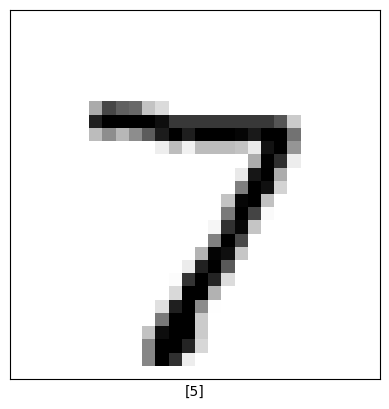

In [ ]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

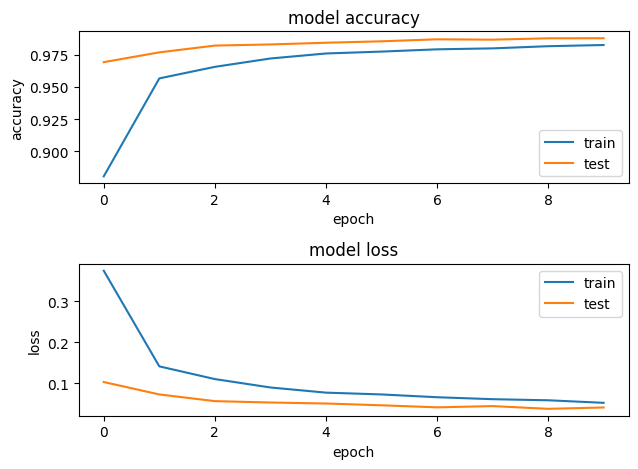

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],100*np.max(predictions_array), [true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

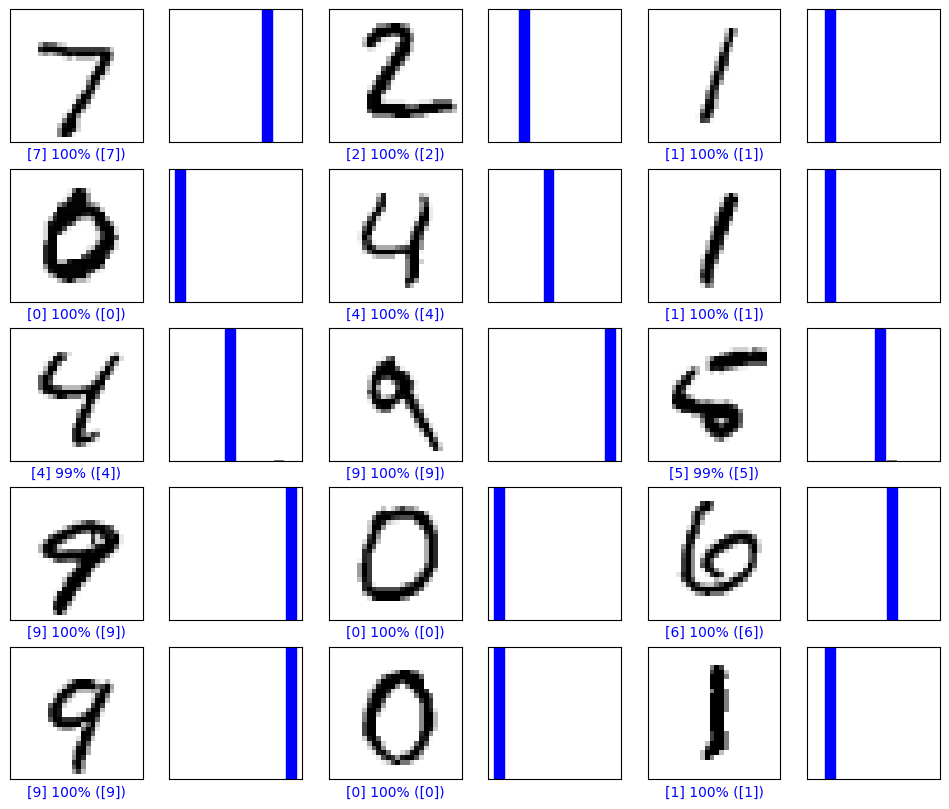

In [ ]:
# Plot the first X test images, their predicted label, and the true label
#Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions, y_test, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions, y_test)
plt.show()